In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第三位まで表示
%precision 3

'%.3f'

相関係数0.889:


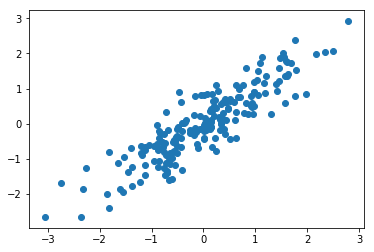

In [3]:
from sklearn.preprocessing import StandardScaler

# RandomStateオブジェクトを作成
sample = np.random.RandomState(1)

# ２つの乱数を生成
X = np.dot(sample.rand(2,2), sample.randn(2,200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関係数の算出とグラフ比
print('相関係数{:.3f}:'.format(sp.stats.pearsonr(X_std[:,0], X_std[:,1])[0]))
plt.scatter(X_std[:,0], X_std[:,1])


In [4]:
from sklearn.decomposition import PCA

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [5]:
# （１）固有ベクトル
# 主成分分析で算出した新しい特徴空間の軸の向きを表す
print(pca.components_)

# （２）各主成分の分散
print('各主成分の分散:{}'.format(pca.explained_variance_))

# （３）各主成分が持つ分散の比率
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))


[[-0.707 -0.707]
 [-0.707  0.707]]
各主成分の分散:[1.899 0.111]
各主成分の分散割合:[0.945 0.055]


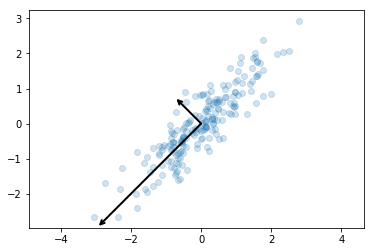

In [6]:
# パラメータ設定
arrowprobs = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)

# 矢印を書くための関数
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprobs)
    
# 元のデータをプロット
plt.scatter(X_std[:,0], X_std[:,1], alpha=0.2)

# 主成分分析の２軸を矢印で表現する
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal');

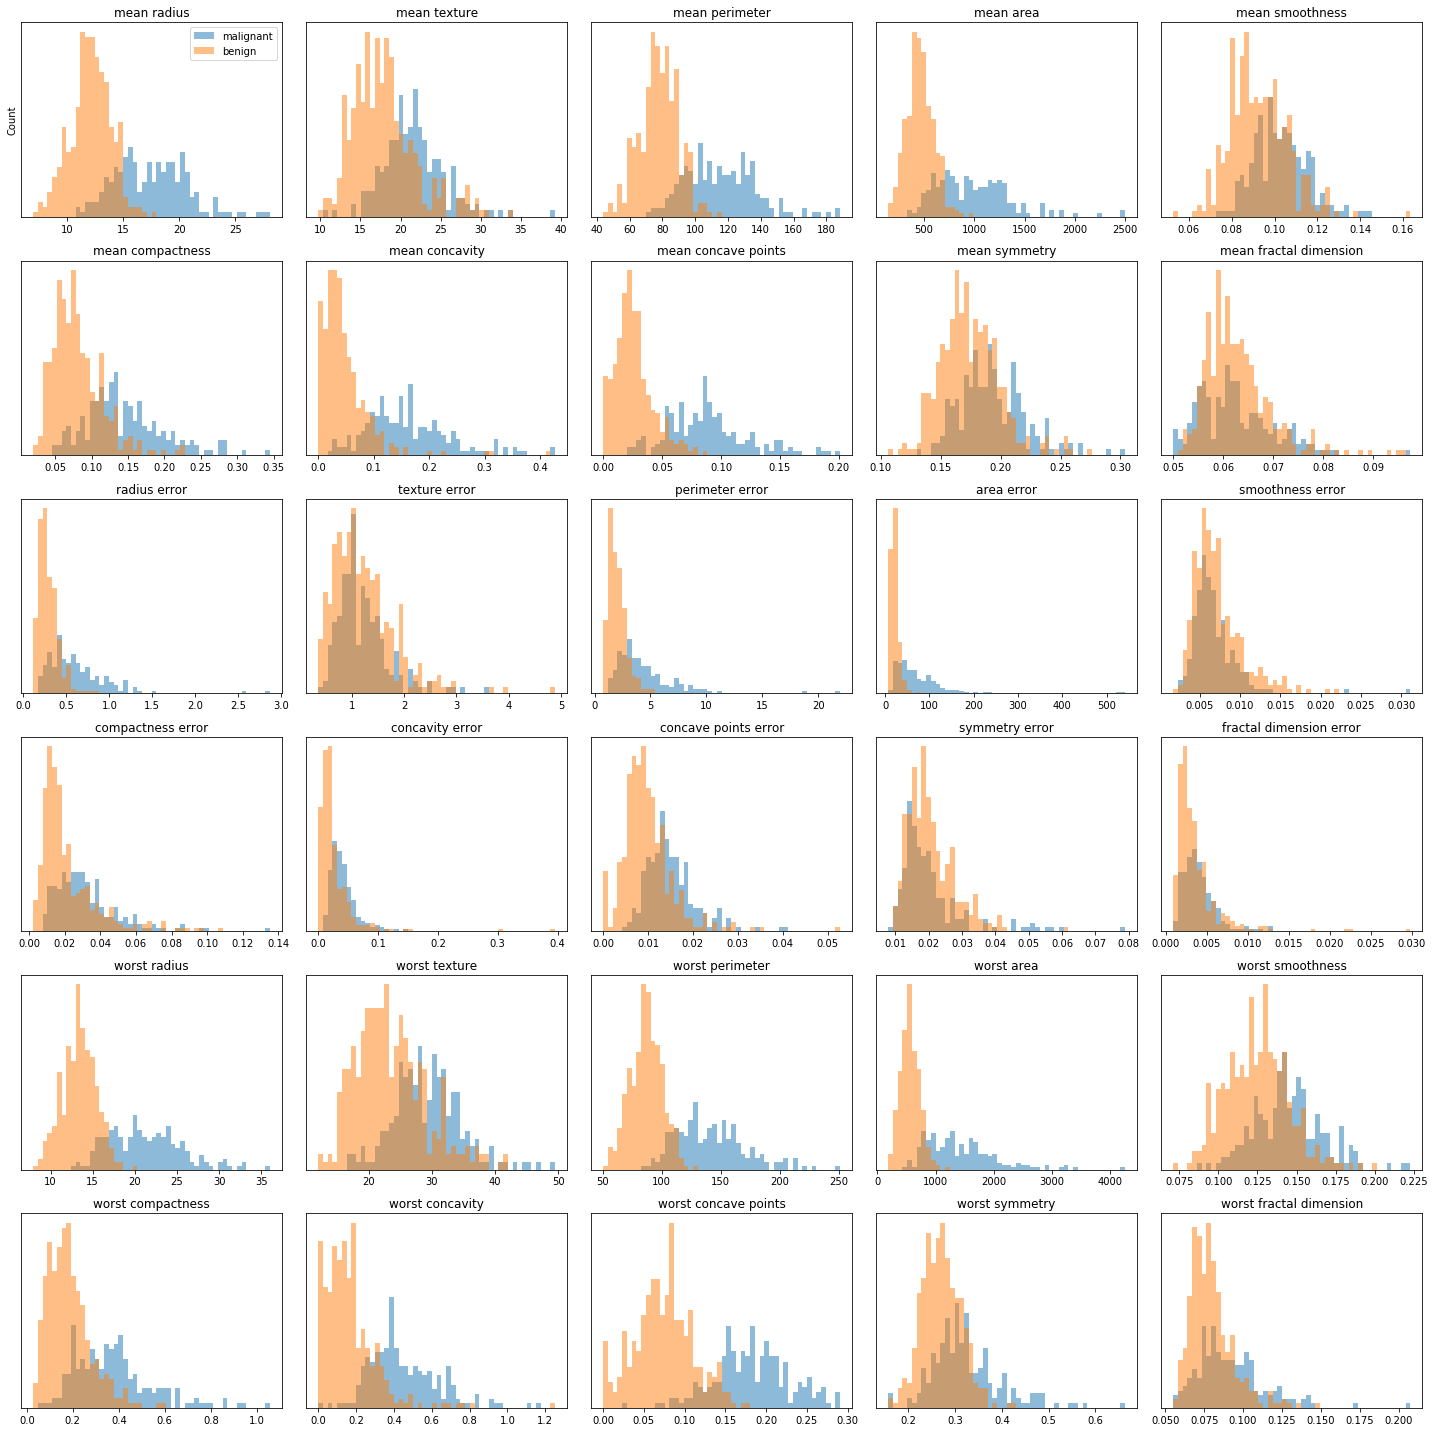

In [7]:
# 乳がんデータを読み込むためのインポート
from sklearn.datasets import load_breast_cancer

# 乳がんデータの取得
cancer = load_breast_cancer()

# データを悪性か良性に分けるためのフィルター処理
# 悪性(malignant)はcancer.targetが0
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

# 悪性(malignant)は青、良性(benign)は橙のヒストグラム
fig, axes = plt.subplots(6, 5, figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins, alpha=.5)
    ax[i].hist(benign[:,i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

# ラベルの設定
ax[0].set_ylabel('Count')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

In [8]:
# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# 表示
print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(569, 2)
Explained variance ratio:[0.443 0.19 ]


In [9]:
# 列にラベルを付ける
X_pca = pd.DataFrame(X_pca, columns=['pca1', 'pca2'])

# 目的変数を紐づける
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

# 悪性良性を分割
pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

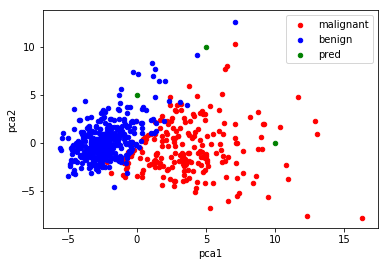

In [10]:
# 悪性をプロット
ax = pca_malignant.plot.scatter(x='pca1', y='pca2', color='red', label='malignant');

# 良性をプロット
pca_benign.plot.scatter(x='pca1', y='pca2', color='blue', label='benign', ax=ax);

# 診断対象をプロット
pred_df = pd.DataFrame([[5, 10],[0, 5],[10, 0]], columns=['pca1', 'pca2'])
pred_df.plot.scatter(x='pca1', y='pca2', color='green', label='pred', ax=ax);

In [11]:
pred_df = pd.DataFrame([[5, 10]], columns=['pca1', 'pca2'])

In [12]:
pred_df

,pca1,pca2
0,5,10


In [13]:
pca_benign

,pca1,pca2,target
19,-1.237063,-0.188215,1
20,-1.578161,0.572808,1
21,-3.557336,1.662950,1
37,-3.749313,-1.413473,1
46,-4.581937,1.484220,1
48,-2.136445,0.095830,1
49,-1.567479,-1.208433,1
50,-3.542906,-1.282496,1
51,-3.157814,-1.688959,1
52,-3.450489,-0.498219,1
